<a href="https://colab.research.google.com/github/Hebaallah61/AI_Project_objectdetection/blob/main/hebaalah1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
from tensorflow import keras

In [4]:
minist=tf.keras.datasets.fashion_mnist

In [5]:
(training_img,training__label),(testing_img,testing_label)=minist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle bot']

In [7]:
training_img.shape

(60000, 28, 28)

In [8]:
training__label.shape

(60000,)

In [15]:
testing_img.shape

(10000, 28, 28)

In [12]:
testing_label.shape

(10000,)

<function matplotlib.pyplot.show>

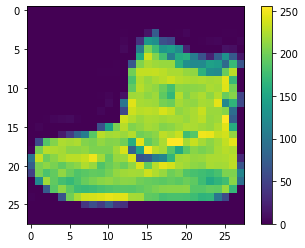

In [14]:
import matplotlib.pyplot as plt
plt.figure() # draw in x axis and y axis
plt.imshow(training_img[0]) # first img in data set
plt.colorbar() # draw with color
plt.grid(False) # dont make it pixels
plt.show

In [16]:
# make normalization that mean make mean between 0 and 1 
#integer from 0 and 255 and float between 0 and 1
training_img=training_img/255.0
testing_img=testing_img/255.0

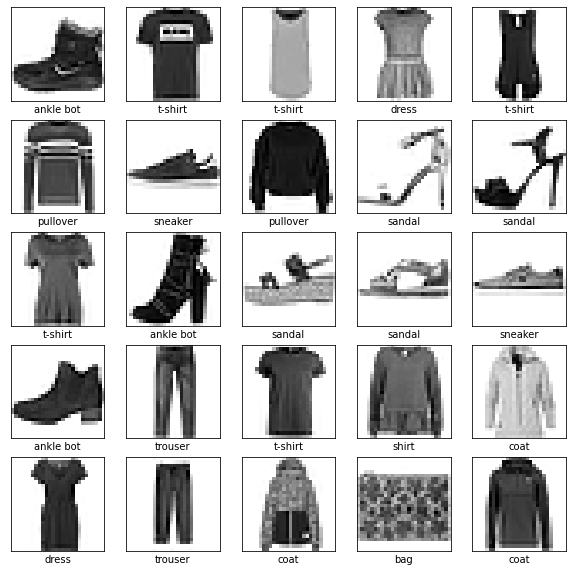

In [20]:
plt.figure(figsize=(10,10)) # 10px * 10 px
for i in range(25): # show 25 img 
  plt.subplot(5,5,i+1) # draw each image alone in area 5*5 and index i+1
  plt.xticks([])# like xlabel
  plt.yticks([])#like y label
  plt.grid(False)
  plt.imshow(training_img[i],cmap=plt.cm.binary) #show image from index i and cmap map colores in img and binary will apear 0or 1 no colores
  plt.xlabel(class_names[training__label[i]]) # show name oof image
plt.show()

In [23]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])
#flatten it is input layer take batch , chanales =0 the size of image is 28,28
#Dense (neurn)its is hidden layer we will make 128 neurn
#the last layer of the classification 


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_img,training__label,epochs=10) # epoch عدد اللفات على الداتا ست كلها 

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5011 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [27]:
test_loss,test_accuracy=model.evaluate(testing_img,testing_label,verbose=2)
print('\n accuracy=',test_accuracy)

313/313 - 1s - loss: 0.3271 - accuracy: 0.8824

 accuracy= 0.8823999762535095


In [29]:
import numpy as np
predict=model.predict(testing_img)
np.argmax(predict[0])

9